# Lab 3

### Task 1

*    Import dataset from sklearn
*    Make the dataframe from the data
*    Describe and info on dataset
*    Value_Counts for target
*    Groupby on target
*    Train test split using sklearn (stratify(with and without) & randomstate)
*    Binarisation using pd.cut

Homework 

*    Do one more dataset from sklearn 
*    Find one more argument in train_test_split

In [ ]:
import sklearn.datasets 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

cancer_ds = sklearn.datasets.load_breast_cancer()

In [ ]:
X = cancer_ds.data
y = cancer_ds.target
y_names = cancer_ds.target_names
print(y[:10])
print(y_names)
print(X[:1])

[0 0 0 0 0 0 0 0 0 0]
['malignant' 'benign']
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]


In [ ]:
cancer_df = pd.DataFrame(cancer_ds.data, columns=cancer_ds.feature_names)
cancer_df['target'] = y
cancer_df['target_name'] = cancer_df['target'].map({0:y_names[1], 1:y_names[0]})
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,benign


In [ ]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
display(cancer_df['target_name'].value_counts())
display(cancer_df['target'].value_counts())

malignant    357
benign       212
Name: target_name, dtype: int64

1    357
0    212
Name: target, dtype: int64

In [ ]:
cancer_df.groupby(['target', 'target_name'],as_index=False).mean()

,target,target_name,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,benign,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,1,malignant,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
X=cancer_df.drop(['target'],axis=1)
y=cancer_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    )

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(512, 31)
(512,)
(57, 31)
(57,)


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

1    317
0    195
Name: target, dtype: int64
1    40
0    17
Name: target, dtype: int64


In [ ]:
print(y_train.value_counts()[1]/ y_train.value_counts()[0])
print(y_test.value_counts()[1]/y_test.value_counts()[0])

1.6256410256410256
2.3529411764705883


In [ ]:
from sklearn.model_selection import train_test_split

X=cancer_df.drop(['target','target_name'],axis=1)
y=cancer_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())
print("\n")
print(y_train.value_counts()[1]/ y_train.value_counts()[0])
print(y_test.value_counts()[1]/y_test.value_counts()[0])

1    321
0    191
Name: target, dtype: int64
1    36
0    21
Name: target, dtype: int64


1.6806282722513088
1.7142857142857142


In [ ]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
413,14.990,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.03876,0.1944,0.05913,0.3186,1.3360,2.310,28.51,0.004449,0.028080,0.03312,0.011960,0.01906,0.004015,16.76,31.55,110.20,867.1,0.10770,0.33450,0.3114,0.13080,0.3163,0.09251
517,19.890,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,0.5079,0.8737,3.654,59.70,0.005089,0.023030,0.03052,0.011780,0.01057,0.003391,23.73,25.23,160.50,1646.0,0.14170,0.33090,0.4185,0.16130,0.2549,0.09136
245,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,0.3719,2.6120,2.517,23.22,0.016040,0.013860,0.01865,0.011330,0.03476,0.003560,11.48,29.46,73.68,402.8,0.15150,0.10260,0.1181,0.06736,0.2883,0.07748
102,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,0.1924,1.5710,1.183,14.68,0.005080,0.006098,0.01069,0.006797,0.01447,0.001532,13.34,32.84,84.58,547.8,0.11230,0.08862,0.1145,0.07431,0.2694,0.06878
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,0.4390,1.0120,3.498,43.50,0.005233,0.030570,0.03576,0.010830,0.01768,0.002967,20.27,36.71,149.30,1269.0,0.16410,0.61100,0.6335,0.20240,0.4027,0.09876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,0.3331,1.9610,2.937,32.52,0.009538,0.049400,0.06019,0.020410,0.02105,0.006000,17.11,36.33,117.70,909.4,0.17320,0.49670,0.5911,0.21630,0.3013,0.10670
230,17.050,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,0.2131,0.06325,0.2959,0.6790,2.153,31.98,0.005532,0.020080,0.03055,0.013840,0.01177,0.002336,19.59,24.89,133.50,1189.0,0.17030,0.39340,0.5018,0.25430,0.3109,0.09061
354,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,0.06083,0.4222,0.8092,3.330,28.84,0.005541,0.033870,0.04505,0.014710,0.03102,0.004831,12.12,15.82,79.62,453.5,0.08864,0.12560,0.1201,0.03922,0.2576,0.07018
103,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,0.06322,0.1803,1.2220,1.528,11.77,0.009058,0.021960,0.03029,0.011120,0.01609,0.003570,10.76,26.83,72.22,361.2,0.15590,0.23020,0.2644,0.09749,0.2622,0.08490


In [ ]:
X_binary_tr = X_train.apply(pd.cut, bins=2, labels=[1,0])
X_binary_te = X_test.apply(pd.cut, bins=2, labels=[1,0])
X_binary_tr.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
413,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
517,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1
245,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
102,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
28,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1


In [ ]:
X_binary_te.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
199,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0
288,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
73,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
121,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1
14,1,0,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0


In [ ]:
X_binary_tr = X_binary_tr.values
X_binary_te = X_binary_te.values

In [ ]:
b = 20

In [ ]:
def get_predictions(X_binary_tr, y_train, b):
  pred = []
  
  # loop to go through the all the values of b for all columns
  for i in range(X_binary_tr.shape[0]):
    # for checking the threshold for predicting the bening and makignant
    if (np.sum(X_binary_tr[i,:]) >= b):
      pred.append(1)
    else : 
      pred.append(0)
  
  # creating a dataframe with predictions and true values
  df = pd.DataFrame(columns=['Predictions', 'True_values'])
  df['Predictions'] = pred
  df['True_values'] = y_train

  #checking if the prediction is sane as y_train
  df['cor_wr'] = df['Predictions']==df['True_values']
  # display(df['cor_wr'].value_counts())
  
  #accuracy = correct_preds/(correct_preds + wrong_preds)
  return df['cor_wr'].value_counts()[1] / (df['cor_wr'].value_counts()[1]+df['cor_wr'].value_counts()[0])

def get_accuracies():
  acc=[]
  bs=[]
  # iterating through all possible values of b ie total number of columns
  for b in range(X_train.shape[1]):
    print("Value of b: ", b, " Accuracy is : ", get_predictions(X_binary_tr, y_train, b))
    bs.append(b)
    acc.append(get_predictions(X_binary_tr, y_train, b))
  return bs, acc

def plot_accuracies(bs, acc) : 
  plt.plot(bs,acc)
  plt.xlabel('Values of b')
  plt.ylabel('Value of accuracy')
  plt.title('Plot depicting the variation in the value of b vs the accuracy')

Value of b:  0  Accuracy is :  0.556640625
Value of b:  1  Accuracy is :  0.556640625
Value of b:  2  Accuracy is :  0.556640625
Value of b:  3  Accuracy is :  0.556640625
Value of b:  4  Accuracy is :  0.556640625
Value of b:  5  Accuracy is :  0.556640625
Value of b:  6  Accuracy is :  0.556640625
Value of b:  7  Accuracy is :  0.556640625
Value of b:  8  Accuracy is :  0.556640625
Value of b:  9  Accuracy is :  0.556640625
Value of b:  10  Accuracy is :  0.556640625
Value of b:  11  Accuracy is :  0.556640625
Value of b:  12  Accuracy is :  0.556640625
Value of b:  13  Accuracy is :  0.5546875
Value of b:  14  Accuracy is :  0.5546875
Value of b:  15  Accuracy is :  0.548828125
Value of b:  16  Accuracy is :  0.548828125
Value of b:  17  Accuracy is :  0.544921875
Value of b:  18  Accuracy is :  0.54296875
Value of b:  19  Accuracy is :  0.541015625
Value of b:  20  Accuracy is :  0.5390625
Value of b:  21  Accuracy is :  0.533203125
Value of b:  22  Accuracy is :  0.529296875
Value

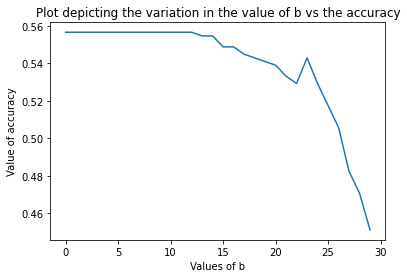

In [ ]:
bs,acc = get_accuracies()
plot_accuracies(bs,acc)

In [ ]:
df['cor_wr'].value_counts()[0]

236

In [ ]:
df['cor_wr'].value_counts()[1]

276

In [ ]:
df['cor_wr'].value_counts()[1] / (df['cor_wr'].value_counts()[1]+df['cor_wr'].value_counts()[0])

0.5390625

In [ ]:
df.fillna(0)

,Predictions,True_values,cor_wr
0,1,0.0,False
1,1,0.0,False
2,1,0.0,False
3,1,0.0,False
4,1,0.0,False
...,...,...,...
507,1,1.0,True
508,1,1.0,True
509,1,0.0,False
510,1,1.0,True


### Lab assignment

In [ ]:
import pandas as pd
z = pd.read_csv('/content/ZillowTabulate - Sheet1 (1).csv')

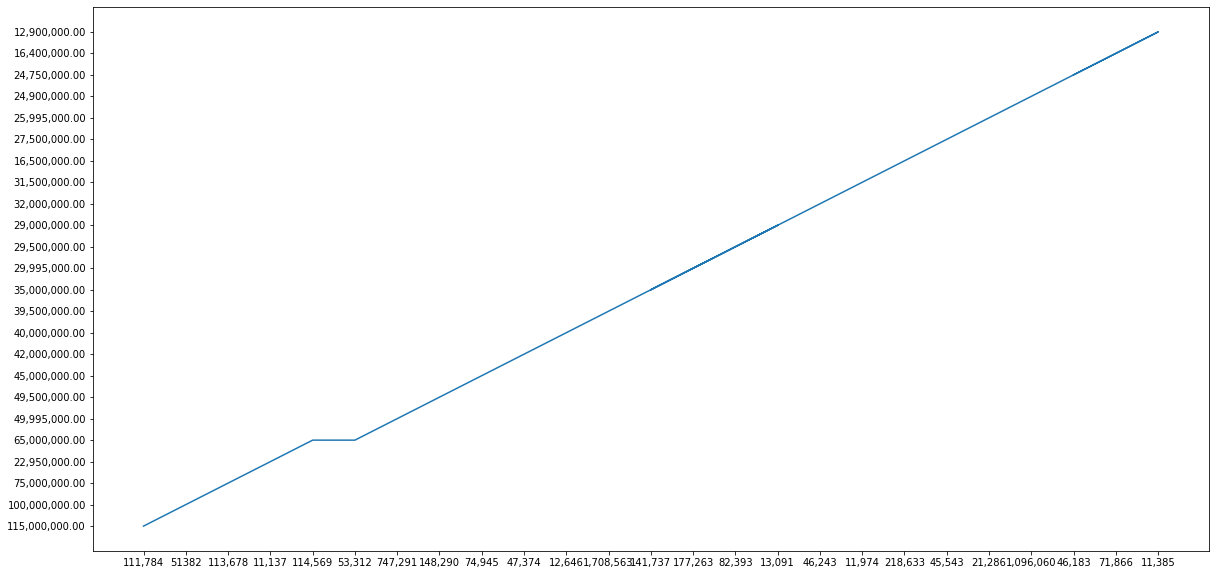

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(z['Lot_Size (sq.ft)'], z['Price ($)'])

In [ ]:
import seaborn as sns
a = z.groupby(['Bedrooms'],as_index=False)['Price ($)'].sum()
a
# sns.barplot(a['Bedrooms'], a['Price ($)'])

,Bedrooms,Price ($)
0,3,"65,000,000.00"
1,4,"22,950,000.0032,000,000.0031,500,000.0027,500,..."
2,5,"100,000,000.0075,000,000.0065,000,000.0049,995..."
3,6,"45,000,000.0042,000,000.0035,000,000.0035,000,..."
4,7,"49,500,000.0024,900,000.00"
5,8,"29,995,000.00"
6,12,"115,000,000.00"


In [ ]:
z

,Location,Price ($),Bedrooms,Bathrooms,Lot_Size (sq.ft),Year Built,min_price($),max_price($)
0,"27930 Pacific Coast Hwy, Malibu, CA 90265","115,000,000.00",12,14,"111,784",1997.0,"12,300,000.00","21,530,000.00"
1,"31118 Broad Beach Rd, Malibu, CA 90265","100,000,000.00",5,14,51382,2020.0,"10,650,000.00","21,470,000.00"
2,"24186 Case Ct, Malibu, CA 90265","75,000,000.00",5,7,"113,678",2021.0,NaN,NaN
3,"22102 Pacific Coast Hwy, Malibu, CA 90265","22,950,000.00",4,4,"11,137",2013.0,"8,590,000.00","15,700,000.00"
4,"33256 Pacific Coast Hwy, Malibu, CA 90265","65,000,000.00",3,4,"114,569",1996.0,"4,100,000.00","6,180,000.00"
5,"24834 Pacific Coast Hwy, Malibu, CA 90265","65,000,000.00",5,8,"53,312",2016.0,"8,400,000.00","13,500,000.00"
6,"5046 Carbon Beach Ter, Malibu, CA 90265","49,995,000.00",5,7,"747,291",2019.0,"12,700,000.00","21,460,000.00"
7,"23800 Malibu Crest Dr, Malibu, CA 90265","49,500,000.00",7,10,"148,290",2019.0,"42,910,000.00","48,450,000.00"
8,"33740 Pacific Coast Hwy, Malibu, CA 90265","45,000,000.00",6,8,"74,945",2013.0,"50,900,000.00","8,100,000.00"
9,"31272 Broad Beach Rd, Malibu, CA 90265","42,000,000.00",6,9,"47,374",2004.0,"34,870,000.00","39,750,000.00"
